In [8]:
%matplotlib inline
import logging
logging.basicConfig(level=logging.CRITICAL)

In [9]:
import torch
import pytorch3d
from pytorch3d.ops import sample_points_from_meshes

# Creating Protein Meshes in Graphein

Graphein provides functionality to create meshes of protein surfaces. The mesh computation is handled under the hood by PyMol to produce `.obj` files, which are handled by many geometric analysis libraries (such as PyTorch3D). We'll create a few protein meshes, convert them to PyTorch3D objects and visualises them. Again, there is a high-level and low-level API for convenience.

## High-level API
### Config
Again, we use a config object to manage global configurations.

* `pymol_command_line_options`: String of additional pymol command line options when launching. A full list can be found [here](https://www.pymolwiki.org/index.php/Command_Line_Options). The default options, `"-cKq"`, do:
   * `c`: launch in command-line only mode for batch processing
   * `K`: keep alive: when running without a GUI, don't quit after the input
            is exhausted
    * `q`: supress startup message 
    
* `pymol_commands` : List of string pymol commands to execute. You can use these to configure the exact mesh you wish to construct. A reference to these can be found [here](https://pymol.org/pymol-command-ref.html)

In [10]:
from graphein.protein.config import ProteinMeshConfig
config = ProteinMeshConfig()
config.dict()

{'pymol_command_line_options': '-cKq', 'pymol_commands': ['show surface']}

### Building a mesh

Let's build a mesh!

In [11]:
from graphein.protein.meshes import create_mesh

verts, faces, aux = create_mesh(pdb_code="3eiy", config=config)
print(verts, faces, aux)

A PyMOL RPC server is already running.
 Error: loading mmCIF into existing object not supported, please use 'create'
        to append to an existing object.

['show surface']
PyMOL>show surface
PyMOL>save /tmp/3eiy.obj
tensor([[ 15.8122,   1.6800, -12.6172],
        [ 15.8122,   1.6800, -12.6172],
        [ 15.8122,   1.6800, -12.6172],
        ...,
        [ 18.5065,   2.7193,  13.5656],
        [ 18.5065,   2.7193,  13.5656],
        [ 18.5065,   2.7193,  13.5656]]) Faces(verts_idx=tensor([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    7,    8],
        ...,
        [5382, 5384, 5383],
        [5385, 5386, 5387],
        [5388, 5390, 5389]]), normals_idx=tensor([[  -1,   -1,   -1],
        [  -1,   -1,   -1],
        [  -1,   -1,   -1],
        ...,
        [5346, 5348, 5347],
        [5349, 5350, 5351],
        [5352, 5354, 5353]]), textures_idx=tensor([[-1, -1, -1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [-1, -1, -

In order to visualise these tensors containing vertices, faces and aux data, we convert them into a PyTorch3D `Mesh` object

/home/atj39/github/graphein/graphein/protein/visualisation.py:46: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<Axes3D:title={'center':'my first mesh'}, xlabel='x', ylabel='z'>

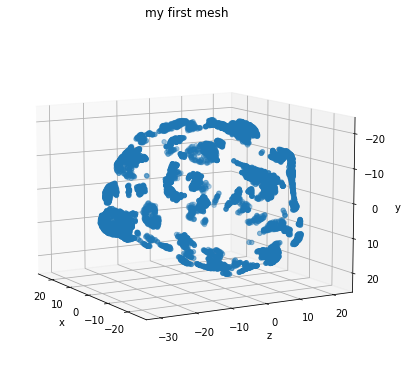

In [12]:
from graphein.protein.meshes import convert_verts_and_face_to_mesh
m = convert_verts_and_face_to_mesh(verts, faces)

from graphein.protein.visualisation import plot_pointcloud
plot_pointcloud(m, title="my first mesh")

Let's see what happens if we play around with some of the parameters and make a smoother mesh

A PyMOL RPC server is already running.
 Error: loading mmCIF into existing object not supported, please use 'create'
        to append to an existing object.

['hide cartoon', 'set solvent_radius, 10', 'alter all, vdw=4', 'sort', 'set surface_quality, 1', 'show surface']
PyMOL>hide cartoon
PyMOL>set solvent_radius, 10
 Setting: solvent_radius set to 10.00000.
PyMOL>alter all, vdw=4
 Alter: modified 1503 atoms.
PyMOL>sort
PyMOL>set surface_quality, 1
 Setting: surface_quality set to 1.
PyMOL>show surface
PyMOL>save /tmp/3eiy.obj


<Axes3D:title={'center':'my second mesh'}, xlabel='x', ylabel='z'>

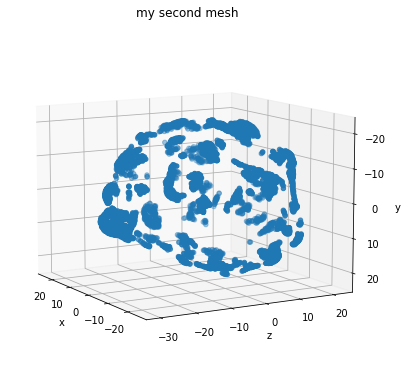

In [13]:
pymol_commands = {"pymol_commands": ["hide cartoon",
                                     "set solvent_radius, 10",
                                     "alter all, vdw=4",
                                     "sort",
                                     "set surface_quality, 1",
                                     "show surface"]}

config = ProteinMeshConfig(**pymol_commands)

verts, faces, aux = create_mesh(pdb_code="3eiy", config=config)

m = convert_verts_and_face_to_mesh(verts, faces)

plot_pointcloud(m, title="my second mesh")